In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(trainx, trainy), (testx,testy) = fashion_mnist.load_data()

In [18]:
trainx

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
trainx.shape, testx.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
trainy.shape, testy.shape

((60000,), (10000,))

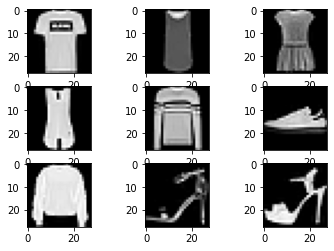

In [7]:
for i in range (1,10):
    plt.subplot(3,3,i)
    
    plt.imshow(trainx[i], cmap=plt.get_cmap('gray'))

In [16]:
model = Sequential()

model.add(Conv2D(64, (5,5), 
                 padding="same", 
                 activation="relu", 
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (5,5), 
                 padding="same", 
                 activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (5,5), 
                 padding="same", 
                 activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [17]:
model.compile(optimizer=Adam(0.0001), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [20]:
hist = model.fit(trainx.astype(np.float32), trainy.astype(np.float32), epochs=10, 
                 validation_data=(testx.astype(np.float32), testy.astype(np.float32)))

Epoch 1/10
1875/1875 [==============================] - 22s 8ms/step - loss: 0.4678 - accuracy: 0.8496 - val_loss: 0.3180 - val_accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2737 - accuracy: 0.9014 - val_loss: 0.2771 - val_accuracy: 0.9013
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2209 - accuracy: 0.9196 - val_loss: 0.2568 - val_accuracy: 0.9077
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1830 - accuracy: 0.9331 - val_loss: 0.2543 - val_accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1466 - accuracy: 0.9464 - val_loss: 0.2590 - val_accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1181 - accuracy: 0.9570 - val_loss: 0.2583 - val_accuracy: 0.9126
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0919 - accuracy: 0.9668 - val_loss: 0.2798 - val_ac

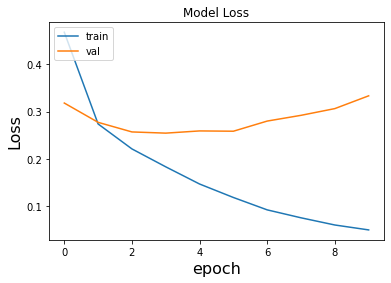

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

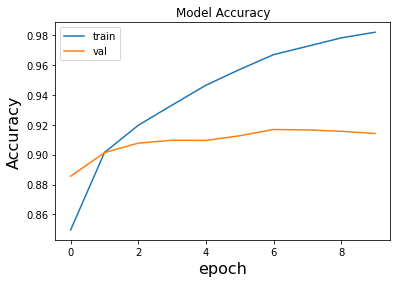

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

sandal
sandal
dress
pullover
trouser
pullover
shirt
bag
tshirt


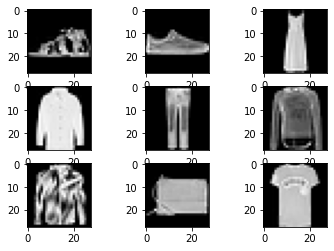

In [43]:
labels = ['tshirt', 'trouser', 'pullover',
         'dress', 'coat', 
          'sandal', 'shirt', 'sneaker',
         'bag', 'ankle_boots']

for i in range(11,20):
    plt.subplot(3,3,i%10)
    
    plt.imshow(testx[i], cmap=plt.get_cmap('gray'))
    y_pred = model.predict(testx[i:i+1])
    print(labels[y_pred.argmax()])